# Homework 12

- Implement a Perceptron. 
- Train and test it for the Iris data set below 
- visualise the data points and the decission boundry of your trained Perceptron on a 2D plot (petal length vs petal width)
- compare to sklearn implementation

In [59]:
import numpy as np
import random

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize'] = 12,10
np.random.seed(3)

In [23]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron as SklearnPerceptron

iris = load_iris()

In [68]:
X = iris.data[:, (2,3)]
y = (iris.target == 1).astype(np.int)

In [69]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

### Check accuracy on sklearn perceptron implementation

In [70]:
sklearnPerceptron = SklearnPerceptron()
sklearnPerceptron.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=None, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [71]:
print("Sklearn Perceptron Accuracy:",sklearnPerceptron.score(X_test, y_test) * 100, "%") 

Sklearn Perceptron Accuracy: 68.4210526316 %


### Create perceptron from scratch

In [72]:
from sklearn.linear_model import SGDClassifier

class Perceptron:
    def __init__(self, alpha = 0.0001):
        self.alpha = alpha
       
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.sgd = self.sgd()
        
    def sgd(self):
        self.model = SGDClassifier(alpha = self.alpha)
        self.model.fit(self.X, self.y)
        
    def score(self, X_test, y_test):
        self.X_test = X_test
        self.y_test = y_test
        self.score = self.model.score(X_test, y_test)
        return self.score

In [73]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

In [74]:
print("Accuracy:",perceptron.score(X_test, y_test) * 100, "%")  

Accuracy: 68.4210526316 %


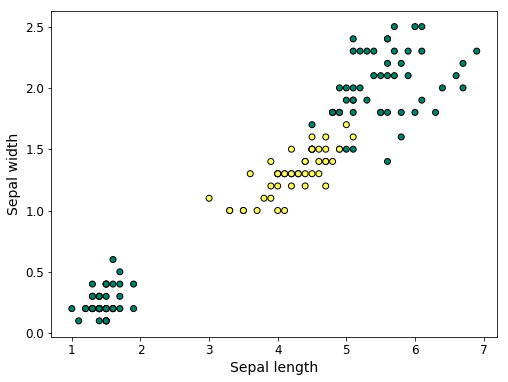

In [77]:
plt.figure(2, figsize=(8, 6))
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.summer,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()